In [6]:
import ETA
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
per = ETA.Perimeter()

In [18]:
per.load_pickle("dla-1-1.p")

Loaded perimeter history from dla-1-1.p


Text(0, 0.5, 'Particles Attached')

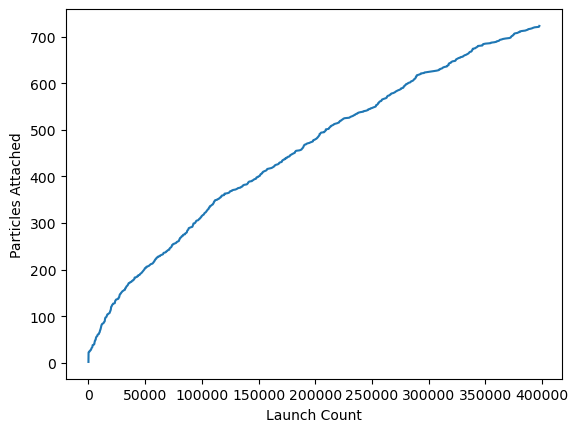

In [16]:
counts = [len(v['points']) for v in per.perimeter_history.values()]
plt.plot(list(per.perimeter_history.keys()), counts)
plt.xlabel("Launch Count")
plt.ylabel("Particles Attached")

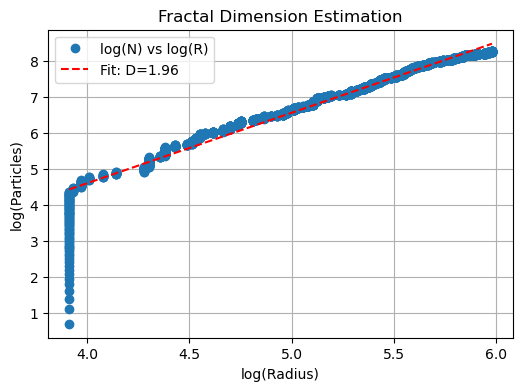

In [21]:
# Fractal Dimension
radii = [record['radius'] // 2 for record in per.perimeter_history.values()]
counts = [len(record['points']) for record in per.perimeter_history.values()]

# convert into log
log_radii = np.log(radii)
log_counts = np.log(counts)

# linear regression: y = D * x + C
D, intercept = np.polyfit(log_radii, log_counts, 1)

plt.figure(figsize=(6, 4))
plt.plot(log_radii, log_counts, 'o', label='log(N) vs log(R)')
plt.plot(log_radii, D * log_radii + intercept, 'r--', label=f'Fit: D={D:.2f}')
plt.xlabel('log(Radius)')
plt.ylabel('log(Particles)')
plt.legend()
plt.title('Fractal Dimension Estimation')
plt.grid(True)
plt.show()